In [207]:
# Standard lib
import sys
import glob
                
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import netCDF4 as nc

In [208]:
# Set path to RCM data
PATH = './data/pr_24hr_50yrs/'

In [209]:
# Create a list of all files in PATH
nc_list = np.asarray(glob.glob(PATH+"*"))

In [210]:
# Create a list of Dataset objects using netCDF4
dataset_list = np.asarray([nc.Dataset(path) for path in nc_list])

In [211]:
dataset_list.shape, nc_list.shape

((35,), (35,))

In [212]:
# Choose one random instance
# -------------------------- #
indx = np.random.randint(0, dataset_list.shape[0])
inst = dataset_list[indx]

In [213]:
inst['pr']

<class 'netCDF4._netCDF4.Variable'>
float64 pr(rlat, rlon)
    units: mm h-1
    _FillValue: nan
    long_name: 50-year 24-hour precipitation flux
unlimited dimensions: 
current shape = (124, 149)
filling on

In [214]:
inst['lat']

<class 'netCDF4._netCDF4.Variable'>
float64 lat(rlat, rlon)
    units: degrees_north
    _FillValue: nan
    long_name: latitude
unlimited dimensions: 
current shape = (124, 149)
filling on

In [215]:
rlat = inst.variables['rlat'][:]
rlon = inst.variables['rlon'][:]
print('rlat', rlat.shape, 'rlon', rlon.shape)

rlat (124,) rlon (149,)


In [221]:
# Create list of parameters in dataset list
lat = [full.variables['lat'][:, :] for full in dataset_list]
lon = [full.variables['lon'][:, :] for full in dataset_list]
pr = [full.variables['pr'][:, :] for full in dataset_list]

# Construct 3D pandas dataframe with each data
# file as a layer in the 3rd dimension
pr={}
for full in dataset_list:
    pr[full] = full.variables['pr'][:, :]

df_pr = pd.Panel(pr)

# Create tuple of 3d df and rotated lat/lon
CanRCM4 = {'df_pr': df_pr, 
           'rlat': rlat, 
           'rlon': rlon
          }

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [302]:
dfx = CanRCM4['df_pr'][dataset_list[1]].T

prx = {'pr': dfx.values.flatten(),
       'rlon': np.tile(CanRCM4['rlon'], len(rlat)),
       'rlat': np.tile(CanRCM4['rlat'], len(rlon))
      }

idx = np.argwhere(~np.isnan(prx['pr']))[:,0]

print(prx['pr'][idx])

prx_maskd = {'pr': prx['pr'][idx],
            'rlon': prx['rlon'][idx],
            'rlat': prx['rlat'][idx]
            }

[2.62967844 2.34698278 2.55407072 ... 1.59810338 1.66034745 1.49151918]


In [303]:
df_prx = pd.DataFrame.from_dict(prx_maskd)

In [304]:
df_prx

,pr,rlon,rlat
0,2.629678,16.279999,21.560001
1,2.346983,16.719986,22.000000
2,2.554071,5.279999,21.560001
3,2.166481,5.719986,22.000000
4,2.274066,-5.720001,21.560001
5,1.982305,-5.280014,22.000000
6,2.361603,-0.440002,26.840000
7,2.202945,-16.720001,21.560001
8,1.977206,-16.280014,22.000000
9,2.230095,-27.720001,21.560001


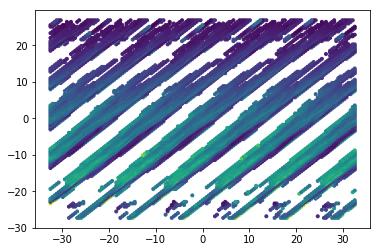

In [308]:
plt.scatter(df_prx['rlon'], df_prx['rlat'], c=df_prx['pr'], marker='.')